# Supermarket Sales Data Analysis

## Objective
To analyze sales data from a supermarket to uncover trends, 
identify strengths and weaknesses and recommend actionable 
insights that can enhance business profitability and operational efficiency.

## Importing necessary libraries

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load the Dataset

In [5]:
df = pd.read_csv("supermarket_sales.csv")

## Display the first few rows of the dataset to understand its structure

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Basic Exploration and Understanding of the Data

### Display basic information about the dataset to understand column types and non-null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Check for missing values in each column to handle data quality issues

In [9]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [17]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

### Display summary statistics to get an idea of numerical data distribution

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Understand Unique Categorical Variables

In [11]:
# Display unique values in key categorical columns
print("Unique Cities:", df['City'].unique())
print("Unique Product Lines:", df['Product line'].unique())
print("Unique Payment Methods:", df['Payment'].unique())

Unique Cities: ['Yangon' 'Naypyitaw' 'Mandalay']
Unique Product Lines: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Unique Payment Methods: ['Ewallet' 'Cash' 'Credit card']


## Data Cleaning

### Convert 'Date' column to datetime format to enable time-based analysis

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

## Analysis and Visualization

### 1. Total Sales by Product Line

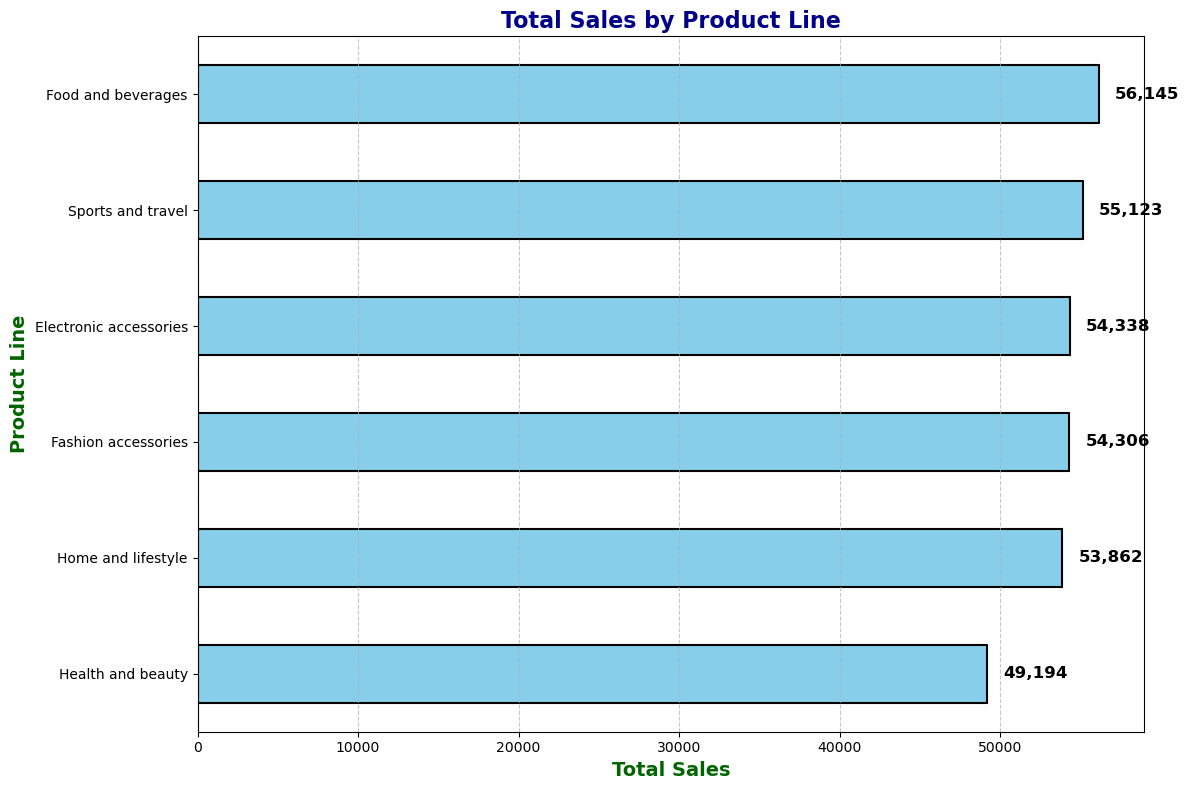

In [48]:
# Grouping the data by 'Product line' and summing the 'Total' sales
sales_by_product = df.groupby('Product line')['Total'].sum().sort_values()

# Create horizontal bar chart with improved styling
plt.figure(figsize=(12, 8))
ax = sales_by_product.plot(kind='barh', color='skyblue', edgecolor='black', linewidth=1.5)

# Adding title, labels, grid, and data labels
plt.title('Total Sales by Product Line', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Total Sales', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Product Line', fontsize=14, fontweight='bold', color='darkgreen')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding data labels to each bar
for index, value in enumerate(sales_by_product):
    ax.text(value + 1000, index, f'{value:,.0f}', va='center', fontsize=12, color='black', fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

### Sales by Product Line
#### Observation:
Certain product lines generate significantly higher sales than others, with products like "Food and Beverages" leading while others show lower contributions.

#### Insight:
Product lines with lower sales may suffer from inadequate marketing, poor product placement, or lower customer demand.

#### Problem to Solve:
How can underperforming product lines be boosted to maximize overall profitability?

#### Recommendation:
1. Use product bundling strategies, combining lower-demand products with popular items.
2. Re-evaluate the pricing strategy or shelf placement for underperforming categories.
3. Conduct customer surveys to understand preferences for low-selling product lines.

### 2. Monthly Sales Trend

### Extract month from 'Date' column for trend analysis

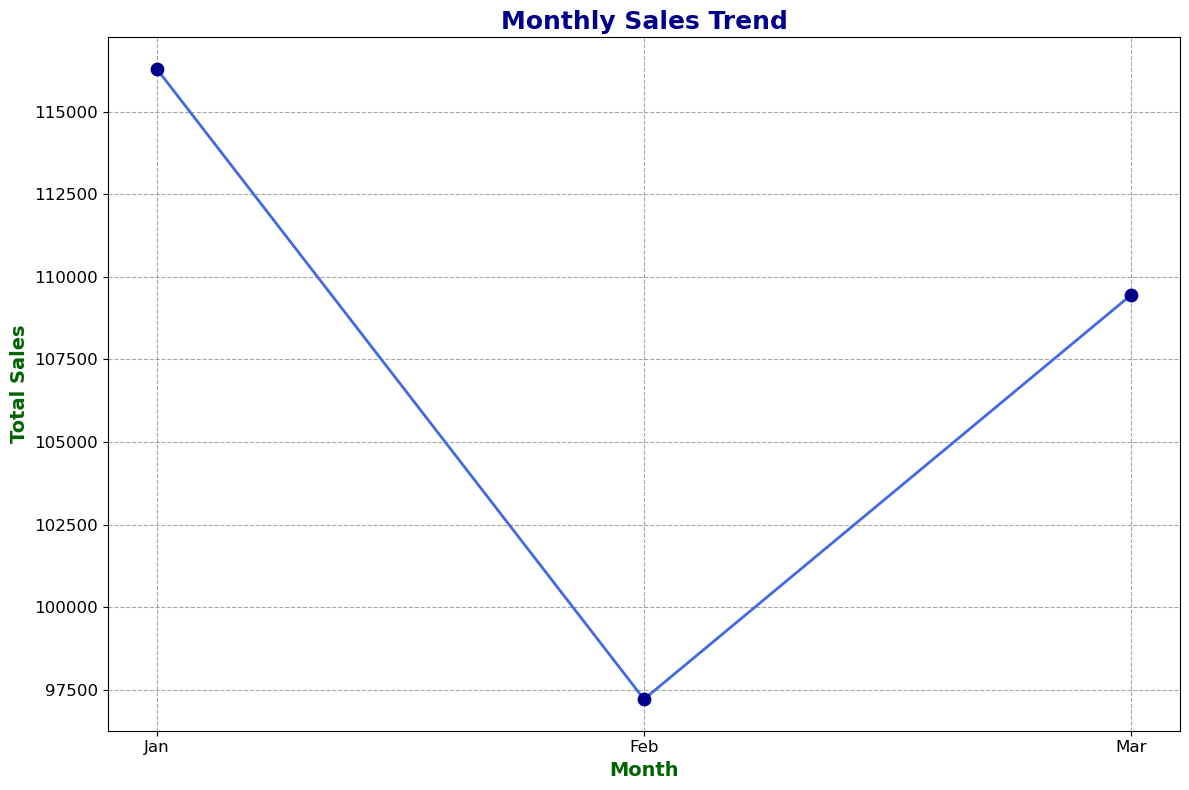

In [58]:
import matplotlib.pyplot as plt

# Grouping data by month and summing the Total sales
monthly_sales = df.groupby(df['Date'].dt.month)['Total'].sum()

# Filtering the data to include only January, February, and March (months 1, 2, and 3)
monthly_sales = monthly_sales[monthly_sales.index.isin([1, 2, 3])]

# Creating the plot with aesthetics
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='royalblue', linewidth=2, markersize=8)
plt.title('Monthly Sales Trend', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Total Sales', fontsize=14, fontweight='bold', color='darkgreen')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.xticks([1, 2, 3], ['Jan', 'Feb', 'Mar'], fontsize=12)  # Limiting the x-axis to Jan, Feb, and Mar
plt.yticks(fontsize=12)
plt.scatter(monthly_sales.index, monthly_sales.values, color='darkblue', s=80, zorder=5)
plt.tight_layout()
plt.show()


### Monthly Sales Trend 
#### Observation:
The sales data for January, February, and March shows monthly variations with a clear decline after January.
#### Insight:
A peak in January may indicate seasonality or promotional impact, while subsequent months reflect lower sales volumes.
#### Problem to Solve:
Why do sales drop after January? Are there fewer promotions, reduced customer engagement, or external factors (e.g., economic conditions)?
#### Recommendation:
Implement loyalty programs and targeted marketing campaigns to sustain customer purchases beyond peak seasons.
Analyze customer behavior and offer discounts on high-demand products during slower months.


### 3. Sales Distribution by City

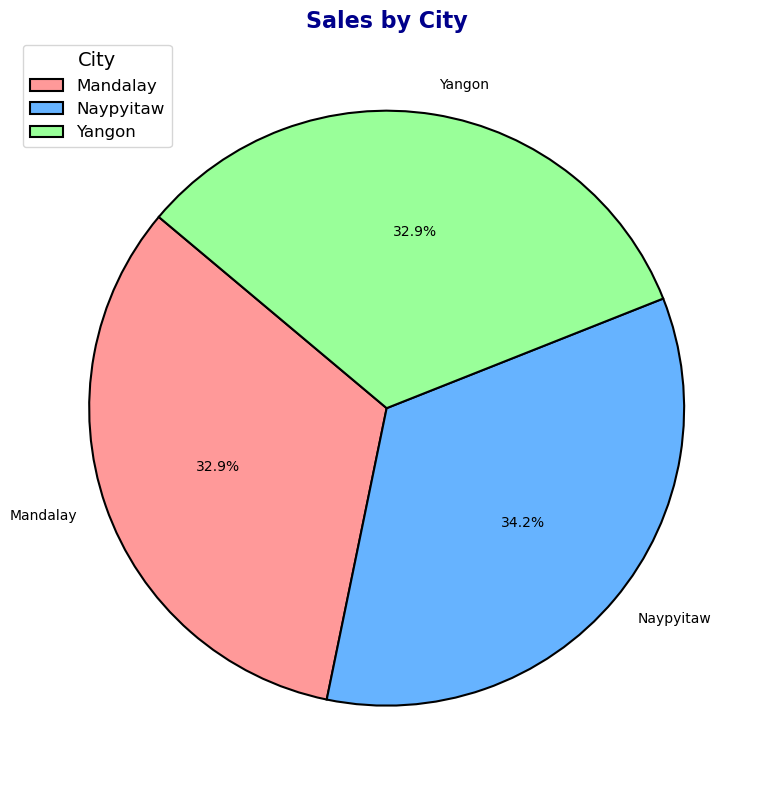

In [53]:
# Grouping sales by city and calculating total sales
city_sales = df.groupby('City')['Total'].sum()

# Plotting the pie chart with customizations
plt.figure(figsize=(8, 8))
city_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'],
                wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Adding title and legend
plt.title('Sales by City', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('')  # Hide y-axis label
plt.legend(city_sales.index, title="City", loc='upper left', fontsize=12, title_fontsize=14)

# Displaying the plot
plt.tight_layout()
plt.show()

### City-wise Sales Distribution

#### Observation:
Sales distribution across cities shows certain cities contributing disproportionately to total revenue.

#### Insight:
Higher sales concentration in one or two cities indicates regional preferences or market potential.

#### Problem to Solve:
How can sales be balanced or increased in lower-performing cities?

#### Recommendation:
1. Invest in localized marketing strategies tailored to consumer behavior in low-performing cities.
2. Explore partnerships or local events to boost brand visibility in these areas.

###  4. Payment Method Distribution

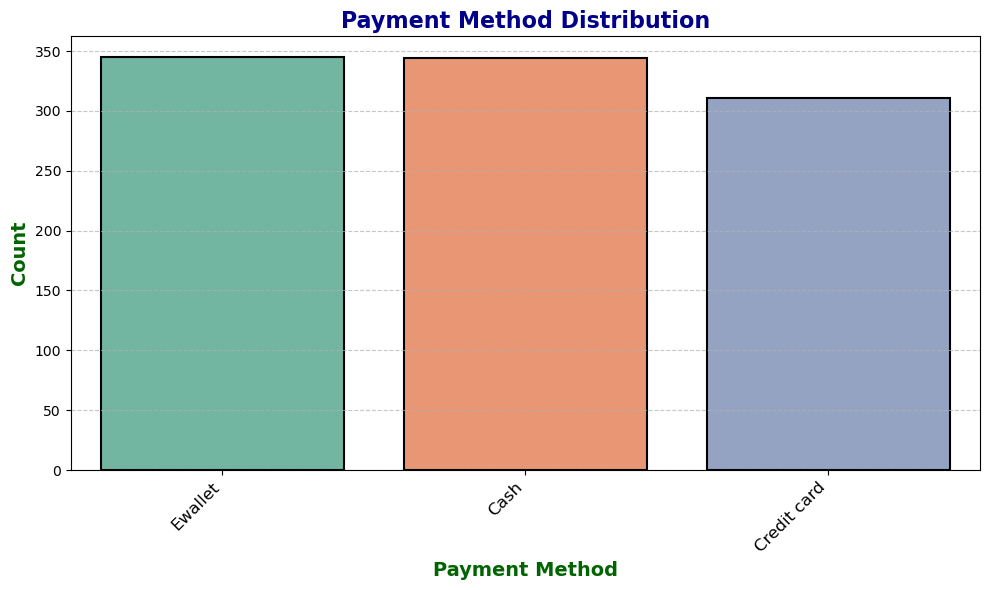

In [54]:
# Creating the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=df, palette='Set2', edgecolor='black', linewidth=1.5)

# Adding title, labels, and grid
plt.title('Payment Method Distribution', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Payment Method', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.tight_layout()
plt.show()


In [47]:
df.value_counts("Payment")

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

### Payment Method Distribution

#### Observation:
The analysis of payment methods indicates that Ewallet may dominate, with cash and credit card trailing.

#### Insight:
Payment preferences can impact the checkout experience and customer satisfaction.

#### Problem to Solve:
Are certain payment methods causing checkout delays or affecting customer retention?

#### Recommendation:
1. Offer promotions tied to less popular payment methods to encourage diverse options.
2. Optimize payment processing times to improve overall customer experience.

# General Business Problems Identified
1. Seasonality in Sales

Solution: Develop off-season marketing strategies and time-specific promotions.

2. Underperforming Product Lines

Solution: Bundle products, adjust pricing, and enhance placement visibility.

3. Regional Sales Disparity

Solution: Localize marketing efforts and invest in brand engagement strategies for weaker markets.

4. Payment Method Optimization

Solution: Promote underutilized payment methods with incentives and improve checkout systems.